### 전처리 완성본

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [3]:
# 모든 컬럼을 보여주도록 설정
pd.set_option('display.max_columns', None)

final = pd.read_csv('/content/drive/MyDrive/전처리 완성본(11.24).csv', index_col=0)
col_list = ['Unnamed: 0', 'Station', 'Previous Station Code',
       'Previous Station Name', 'Up/Down Line', 'Day of Week', 'Hour',
       'Minute', 'Route Code', 'Car Index', 'Congestion', 'Number of Transfer',
       'Fast Transfer', 'Fast Get Off', '06-07시간대 승차', '06-07시간대 하차', '07-08시간대 승차',
       '07-08시간대 하차', '08-09시간대 승차', '08-09시간대 하차', '09-10시간대 승차',
       '09-10시간대 하차', '10-11시간대 승차', '10-11시간대 하차']
final.columns = col_list

final.head()

,Unnamed: 0,Station,Previous Station Code,Previous Station Name,Up/Down Line,Day of Week,Hour,Minute,Route Code,Car Index,Congestion,Number of Transfer,Fast Transfer,Fast Get Off,06-07시간대 승차,06-07시간대 하차,07-08시간대 승차,07-08시간대 하차,08-09시간대 승차,08-09시간대 하차,09-10시간대 승차,09-10시간대 하차,10-11시간대 승차,10-11시간대 하차
0,0,201,202,을지로입구역,0,FRI,6,0,0.0,0,14.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]",22.84192,193.85381,57.493598,697.334158,86.59597,2333.077464,22.84192,193.85381,57.493598,697.334158
1,1,201,202,을지로입구역,0,FRI,6,0,0.0,1,21.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]",22.84192,193.85381,57.493598,697.334158,86.59597,2333.077464,22.84192,193.85381,57.493598,697.334158
2,2,201,202,을지로입구역,0,FRI,6,0,0.0,2,20.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]",22.84192,193.85381,57.493598,697.334158,86.59597,2333.077464,22.84192,193.85381,57.493598,697.334158
3,3,201,202,을지로입구역,0,FRI,6,0,0.0,3,16.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]",22.84192,193.85381,57.493598,697.334158,86.59597,2333.077464,22.84192,193.85381,57.493598,697.334158
4,4,201,202,을지로입구역,0,FRI,6,0,0.0,4,13.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]",22.84192,193.85381,57.493598,697.334158,86.59597,2333.077464,22.84192,193.85381,57.493598,697.334158


In [4]:
# 1. station, dow, hour, minute, rounte code 당 칸 별 congestion 하나로 합치기

# 'station'를 기준으로 그룹화하고 'Congestion' 값을 배열로 합치기
final1 = final.groupby(['Station', 'Previous Station Code', 'Previous Station Name', 'Up/Down Line',
                            'Day of Week', 'Hour', 'Minute', 'Route Code', 'Number of Transfer',
       'Fast Transfer', 'Fast Get Off', '06-07시간대 승차', '06-07시간대 하차',
       '07-08시간대 승차', '07-08시간대 하차', '08-09시간대 승차', '08-09시간대 하차',
       '09-10시간대 승차', '09-10시간대 하차', '10-11시간대 승차', '10-11시간대 하차']).agg({'Congestion': lambda x: x.tolist()}).reset_index()

# 새로운 컬럼을 생성하고 배열의 각 요소를 해당 컬럼에 할당
for i in range(10):
    final1[f'Congestion{i}'] = final1['Congestion'].apply(lambda x: x[i] if i < len(x) else None)

# 'Congestion' 컬럼 및 중간 단계 컬럼 제거
final1 = final1.drop(columns=['Congestion'], axis=1)


In [5]:
# 2. 승/하차 인원을 시간대에 맞게 남기기

# '승차인원' 및 '하차인원' 컬럼 생성
for index, row in final1.iterrows():
    hour = row['Hour']
    final1.loc[index, 'GetIn_cnt'] = row[f'{hour:02d}-{hour+1:02d}시간대 승차']
    final1.loc[index, 'GetOut_cnt'] = row[f'{hour:02d}-{hour+1:02d}시간대 하차']

# 'Hour' 컬럼 및 중간 단계 컬럼 제거
final2 = final1.drop(columns=[f'{hour:02d}-' + f'{hour+1:02d}시간대 승차' for hour in range(6, 11)] +
                          [f'{hour:02d}-' + f'{hour+1:02d}시간대 하차' for hour in range(6, 11)])

In [6]:
# 3. 이전 역 칸별 혼잡도 컬럼 추가

# 새로운 컬럼 PrevCongestion0, PrevCongestion2, PrevCongestion3, ,,,, PrevCongestion9 만들기
for i in range(10):
    final2[f'PrevCongestion{i}'] = None

# 'Hour'와 'Minute'를 합친 새로운 컬럼 'HourMinute' 만들기
final2['HourMinute'] = final2['Hour'].astype(str).str.zfill(2) + final2['Minute'].astype(str).str.zfill(2)

# 'PrevCongestion' 컬럼 값 채우기
for index, row in final2.iterrows():
    for i in range(10):
        prev_col_name = f'PrevCongestion{i}'
        minute_adjust = -50 if row['Minute'] == 0 else -10  # minute이 0이면 -50, 아니면 -10
        condition = (
            (final2['Station'] == row['Station']) &
            (final2['Day of Week'] == row['Day of Week']) &
            (final2['Route Code'] == row['Route Code']) &
            (final2['HourMinute'].astype(int) == (row['Hour'] * 100 + row['Minute'] + minute_adjust))
        )
        matching_row = final2.loc[condition, f'Congestion{i}']
        final2.loc[index, prev_col_name] = matching_row.values[0] if not matching_row.empty else None

# NaN 값 처리
final2.fillna(value=pd.np.nan, inplace=True)

<ipython-input-6-6692d9d3b1cc>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  final2.fillna(value=pd.np.nan, inplace=True)


## Model

In [12]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.7 MB/s eta 0:00:00


In [13]:
import sys
!pip install -q sktime
from tqdm import tqdm
import xgboost as xgb
import pandas as pd
import numpy as np
from datetime import datetime
import math
import os
from xgboost import XGBRegressor
import platform
import optuna
from sktime.forecasting.model_selection import temporal_train_test_split

### 1. 전처리

In [14]:
# DOW, time feature engineering
def time_features(dataframe):
    # 요일을 숫자로 매핑
    day_of_week_mapping = {'MON': 0, 'TUE': 1, 'WED': 2, 'THU': 3, 'FRI': 4}
    dataframe['Day of Week'] = dataframe['Day of Week'].map(day_of_week_mapping)

    # 시간 정보를 이용하여 새로운 변수 생성
    dataframe['sin_time'] = np.sin(2 * np.pi * dataframe['Hour'] / 24)
    dataframe['cos_time'] = np.cos(2 * np.pi * dataframe['Hour'] / 24)

    # 분 정보를 이용하여 새로운 변수 생성 (사인 및 코사인 변환)
    dataframe['sin_minute'] = np.sin(2 * np.pi * dataframe['Minute'] / 60)
    dataframe['cos_minute'] = np.cos(2 * np.pi * dataframe['Minute'] / 60)

    return dataframe

In [15]:
# drop & one-hot encoding
def drop_columns_and_one_hot_encode(dataframe):
    # drop
    columns_to_drop = ['Previous Station Name', 'HourMinute']
    dataframe.drop(columns=columns_to_drop, inplace=True)

    # one-hot encoding
    dataframe = pd.get_dummies(dataframe, columns=['Route Code'])

    return dataframe


In [16]:
# Fast Transfer, Fast Get Off

import ast

def process_fast_columns(df):
    # 컬럼의 값을 리스트로 변환
    df['Fast Transfer'] = df['Fast Transfer'].apply(ast.literal_eval)
    df['Fast Get Off'] = df['Fast Get Off'].apply(ast.literal_eval)

    # 리스트의 값을 int로 변환하고 NumPy 배열로 변환
    df['Fast Transfer'] = df['Fast Transfer'].apply(lambda x: np.array([int(val) for val in x]))
    df['Fast Get Off'] = df['Fast Get Off'].apply(lambda x: np.array([int(val) for val in x]))

    # 'Fast Transfer' 컬럼의 값을 펼쳐서 새로운 컬럼에 할당
    for i in range(10):
        new_column_name = f'Fast Transfer{i}'
        df[new_column_name] = df['Fast Transfer'].apply(lambda x: x[i] if (isinstance(x, np.ndarray) and i < len(x)) else np.nan)

    # 'Fast Get Off' 컬럼의 값을 펼쳐서 새로운 컬럼에 할당
    for i in range(10):
        new_column_name = f'Fast Get Off{i}'
        df[new_column_name] = df['Fast Get Off'].apply(lambda x: x[i] if (isinstance(x, np.ndarray) and i < len(x)) else np.nan)

    # 원래 컬럼은 삭제 (옵션)
    df = df.drop(['Fast Transfer', 'Fast Get Off'], axis=1)

    return df


In [17]:
df = final2.copy()

# 결측값 처리
df.fillna(0, inplace=True)

# 함수 적용

df = time_features(df)
df = drop_columns_and_one_hot_encode(df)
df = process_fast_columns(df)

df.head()

,Station,Previous Station Code,Up/Down Line,Day of Week,Hour,Minute,Number of Transfer,Congestion0,Congestion1,Congestion2,Congestion3,Congestion4,Congestion5,Congestion6,Congestion7,Congestion8,Congestion9,GetIn_cnt,GetOut_cnt,PrevCongestion0,PrevCongestion1,PrevCongestion2,PrevCongestion3,PrevCongestion4,PrevCongestion5,PrevCongestion6,PrevCongestion7,PrevCongestion8,PrevCongestion9,sin_time,cos_time,sin_minute,cos_minute,Route Code_0.0,Route Code_1.0,Route Code_2.0,Route Code_3.0,Route Code_4.0,Route Code_5.0,Fast Transfer0,Fast Transfer1,Fast Transfer2,Fast Transfer3,Fast Transfer4,Fast Transfer5,Fast Transfer6,Fast Transfer7,Fast Transfer8,Fast Transfer9,Fast Get Off0,Fast Get Off1,Fast Get Off2,Fast Get Off3,Fast Get Off4,Fast Get Off5,Fast Get Off6,Fast Get Off7,Fast Get Off8,Fast Get Off9
0,201,202,0,4,6,0,1.0,14.0,21.0,20.00,16.0,13.0,11.00,12.0,16.00,15.0,12.0,22.84192,193.85381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.123234e-17,0.000000,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
1,201,202,0,4,6,0,1.0,14.0,21.0,20.00,16.0,13.0,11.00,12.0,16.00,15.0,12.0,22.84192,193.85381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.123234e-17,0.000000,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
2,201,202,0,4,6,0,1.0,14.5,21.5,20.75,16.5,13.5,11.25,12.5,16.75,15.5,12.5,22.84192,193.85381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.123234e-17,0.000000,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
3,201,202,0,4,6,10,1.0,7.0,11.0,12.00,9.0,10.0,16.00,5.0,9.00,6.0,5.0,22.84192,193.85381,14.0,21.0,20.0,16.0,13.0,11.0,12.0,16.0,15.0,12.0,1.0,6.123234e-17,0.866025,0.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
4,201,202,0,4,6,10,1.0,7.0,11.0,12.00,9.0,10.0,16.00,5.0,9.00,6.0,5.0,22.84192,193.85381,14.0,21.0,20.0,16.0,13.0,11.0,12.0,16.0,15.0,12.0,1.0,6.123234e-17,0.866025,0.5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0


### 2. train/validation 분리

In [18]:
# train/validation 분리
## 1안) 요일/시간 단위로 덩어리째 분리

import random

# Validation set 정의
validation = pd.DataFrame()

# Train set 정의
train_indices = []

# Station의 random number 20개
random_stations = random.sample(df['Station'].unique().tolist(), 20)

# Hour, Day of Week random selection
for station in random_stations:
    random_hour = random.choice(df['Hour'].unique())  # Hour 중 랜덤하게 선택
    random_day_of_week = random.choice(df['Day of Week'].unique())  # Day of Week 중 랜덤하게 선택

    condition = (df['Station'] == station) & (df['Hour'] == random_hour) & (df['Day of Week'] == random_day_of_week)
    filtered_data = df[condition]

    validation = pd.concat([validation, filtered_data], ignore_index=True)
    train_indices.extend(filtered_data.index.tolist())

# Train set 구성
train = df.loc[~df.index.isin(train_indices)]


# 데이터 개수 및 정보 확인
print("Train set 개수:", len(train))
print("Validation set 개수:", len(validation))
print("\nValidation set 정보:")
print(validation.groupby(['Station', 'Day of Week', 'Hour'])['Station'].count())

Train set 개수: 29148
Validation set 개수: 552

Validation set 정보:
Station  Day of Week  Hour
201      1            6       30
202      0            9       30
204      3            6       30
208      3            10      30
212      0            10      24
214      0            6       24
215      0            6       24
216      3            8       24
217      2            9       24
219      1            9       24
221      0            7       24
224      1            6       24
233      4            10      30
236      2            7       30
237      4            6       30
238      1            10      30
240      3            10      30
241      2            10      30
242      0            10      30
243      1            6       30
Name: Station, dtype: int64


In [25]:
## 2안) 아예 random하게 (일반적인 방식)

import xgboost as xgb
from sklearn.model_selection import train_test_split

# target_list 정의
target_list = ['Congestion0', 'Congestion1', 'Congestion2', 'Congestion3', 'Congestion4',
               'Congestion5', 'Congestion6', 'Congestion7', 'Congestion8', 'Congestion9']

# X, y를 추출
X = df.drop(target_list, axis=1)
y = df[target_list]

# train 데이터와 validation 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# xgb.DMatrix로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

### 3. 모델 구축

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# XGBoost 하이퍼파라미터
xgb_params = {
    'colsample_bytree': 0.8,
    'eta': 0.1,
    'max_depth': 5,
    'min_child_weight': 6,
    'n_estimators': 1000,
    'subsample': 0.9,
}

# XGBoost 모델 정의
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Multioutput 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 각 타겟에 대한 RMSE 계산
rmse_per_target = []
for i in range(y_test.shape[1]):
    rmse_i = mean_squared_error(y_test.iloc[:, i], y_pred[:, i], squared=False)
    rmse_per_target.append(rmse_i)
    print(f"Root Mean Squared Error for Target {i+1}: {rmse_i}")

# 각 타겟에 대한 RMSE 결과 출력
print("Root Mean Squared Error for Each Target:", rmse_per_target)

Root Mean Squared Error for Target 1: 4.951356642028545
Root Mean Squared Error for Target 2: 5.505708779460603
Root Mean Squared Error for Target 3: 5.7471652333998415
Root Mean Squared Error for Target 4: 6.0881055371015345
Root Mean Squared Error for Target 5: 5.594314995873892
Root Mean Squared Error for Target 6: 5.734741503103421
Root Mean Squared Error for Target 7: 5.988472035907379
Root Mean Squared Error for Target 8: 5.268814250658734
Root Mean Squared Error for Target 9: 4.7638291376183295
Root Mean Squared Error for Target 10: 4.926866383676167
Root Mean Squared Error for Each Target: [4.951356642028545, 5.505708779460603, 5.7471652333998415, 6.0881055371015345, 5.594314995873892, 5.734741503103421, 5.988472035907379, 5.268814250658734, 4.7638291376183295, 4.926866383676167]


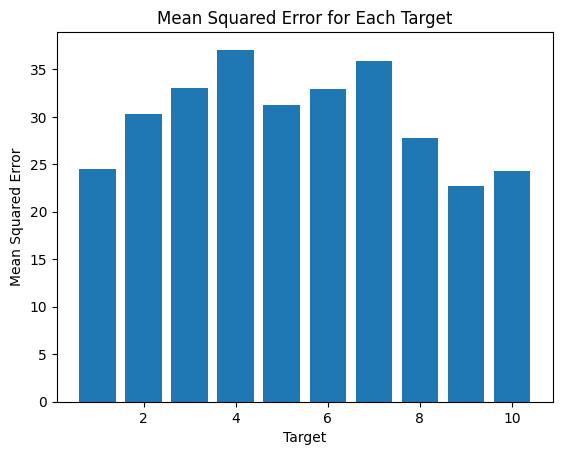

In [43]:
import matplotlib.pyplot as plt

# MSE 시각화
plt.bar(range(1, len(mse_per_target)+1), mse_per_target)
plt.xlabel('Target')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Each Target')
plt.show()